In [36]:
from pathlib import Path

NB_DIR = Path.cwd().resolve()
BASE = next(p for p in [NB_DIR, *NB_DIR.parents] if (p / "data" / "raw").exists())

DATA_DIR         = BASE / "data"
RAW_DIR          = DATA_DIR / "raw"
INTERMEDIATE_DIR = DATA_DIR / "intermediate"
PROCESSED_DIR    = DATA_DIR / "processed"
ARTIF_DIR        = PROCESSED_DIR / "artifacts"
REPORTS_DIR      = PROCESSED_DIR / "reports"

for d in (INTERMEDIATE_DIR, PROCESSED_DIR, ARTIF_DIR, REPORTS_DIR):
    d.mkdir(parents=True, exist_ok=True)

BASE, RAW_DIR


(WindowsPath('C:/ETL/Workshop#3'), WindowsPath('C:/ETL/Workshop#3/data/raw'))

In [37]:
import pandas as pd

csvs = sorted(RAW_DIR.glob("*.csv"))
assert len(csvs) >= 5, f"Se esperaban ≥5 CSV en {RAW_DIR}, encontrados: {len(csvs)}"
csvs


[WindowsPath('C:/ETL/Workshop#3/data/raw/2015.csv'),
 WindowsPath('C:/ETL/Workshop#3/data/raw/2016.csv'),
 WindowsPath('C:/ETL/Workshop#3/data/raw/2017.csv'),
 WindowsPath('C:/ETL/Workshop#3/data/raw/2018.csv'),
 WindowsPath('C:/ETL/Workshop#3/data/raw/2019.csv')]

Unificado guardado: C:\ETL\Workshop#3\data\intermediate\unified.csv | (782, 32)


,row_id,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,...,Trust..Government.Corruption.,Dystopia.Residual,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
0,0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,...,0.089848,1.83291,78.5,nan,5.3795,0.96,1.2655,0.699,0.4495,0.082
1,1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,...,0.089848,1.83291,78.5,nan,5.3795,0.96,1.2655,0.699,0.4495,0.082
2,2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,...,0.089848,1.83291,78.5,nan,5.3795,0.96,1.2655,0.699,0.4495,0.082
3,3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,...,0.089848,1.83291,78.5,nan,5.3795,0.96,1.2655,0.699,0.4495,0.082
4,4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,...,0.089848,1.83291,78.5,nan,5.3795,0.96,1.2655,0.699,0.4495,0.082
5,5,Finland,Western Europe,6.0,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,...,0.089848,1.83291,78.5,nan,5.3795,0.96,1.2655,0.699,0.4495,0.082
6,6,Netherlands,Western Europe,7.0,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,...,0.089848,1.83291,78.5,nan,5.3795,0.96,1.2655,0.699,0.4495,0.082
7,7,Sweden,Western Europe,8.0,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,...,0.089848,1.83291,78.5,nan,5.3795,0.96,1.2655,0.699,0.4495,0.082
8,8,New Zealand,Australia and New Zealand,9.0,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,...,0.089848,1.83291,78.5,nan,5.3795,0.96,1.2655,0.699,0.4495,0.082
9,9,Australia,Australia and New Zealand,10.0,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,...,0.089848,1.83291,78.5,nan,5.3795,0.96,1.2655,0.699,0.4495,0.082


,col,dtype
row_id,row_id,int64
Country,Country,object
Region,Region,object
Happiness Rank,Happiness Rank,float64
Happiness Score,Happiness Score,float64
Standard Error,Standard Error,float64
Economy (GDP per Capita),Economy (GDP per Capita),float64
Family,Family,float64
Health (Life Expectancy),Health (Life Expectancy),float64
Freedom,Freedom,float64


'Sin nulos'

,count,mean,std,min,25%,50%,75%,max
row_id,782.0,390.500000,225.888247,0.000000,195.250000,390.500000,585.750000,781.000000
Happiness Rank,782.0,79.095908,28.875241,1.000000,79.000000,79.000000,79.000000,158.000000
Happiness Score,782.0,5.323441,0.725250,2.839000,5.286000,5.286000,5.286000,7.587000
Standard Error,782.0,0.044737,0.007849,0.018480,0.043940,0.043940,0.043940,0.136930
Economy (GDP per Capita),782.0,0.943565,0.262932,0.000000,0.973060,0.973060,0.973060,1.824270
Family,782.0,1.004438,0.247580,0.000000,0.953977,1.025665,1.082465,1.610574
Health (Life Expectancy),782.0,0.621761,0.154367,0.000000,0.640450,0.640450,0.640450,1.025250
Freedom,782.0,0.409019,0.116763,0.000000,0.392813,0.418347,0.449940,0.669730
Trust (Government Corruption),782.0,0.119988,0.075150,0.000000,0.106130,0.106130,0.106130,0.551910
Generosity,782.0,0.218576,0.122321,0.000000,0.130000,0.201982,0.278832,0.838075


,n_outliers
Dystopia Residual,314
Happiness Score,314
Economy (GDP per Capita),314
Health (Life Expectancy),314
Happiness Rank,313
Trust (Government Corruption),313
Freedom to make life choices,312
Score,312
Social support,312
Healthy life expectancy,312


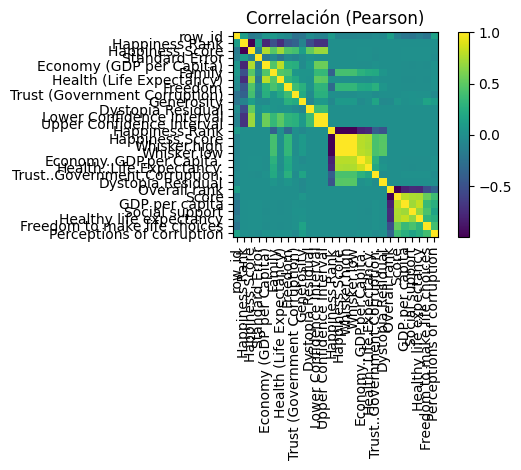

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ROW_ID = "row_id"                                # id interno
TARGET = "Happiness Score"                       # cambia si es otro

def unify_and_etl(paths):
    # Unificar
    parts = []
    for p in paths:
        df = pd.read_csv(p)
        df["source_file"] = p.name
        if "Year" in df.columns and "source_year" not in df.columns:
            df["source_year"] = df["Year"]
        parts.append(df)
    df_uni = pd.concat(parts, ignore_index=True)
    df_uni.columns = [c.strip() for c in df_uni.columns]
    df_uni = df_uni.reset_index(drop=False).rename(columns={"index": ROW_ID})

    # ETL (en memoria, NO guardamos features.csv aquí)
    df = df_uni.copy()
    # 1) limpiar strings
    for c in df.columns:
        if df[c].dtype == "object":
            df[c] = df[c].astype(str).str.strip()
    # 2) tipificar numéricos si ≥90% castea
    for c in df.columns:
        if df[c].dtype == "object":
            conv = pd.to_numeric(df[c], errors="coerce")
            if conv.notna().mean() >= 0.90:
                df[c] = conv
    # 3) imputación
    for c in df.select_dtypes(include=[np.number]).columns:
        if df[c].isna().any(): df[c] = df[c].fillna(df[c].median())
    for c in df.select_dtypes(include=["object"]).columns:
        if df[c].isna().any(): df[c] = df[c].fillna("Unknown")

    return df_uni, df

df_uni, df = unify_and_etl(csvs)

# Guardamos SOLO el unificado de prueba
unified_path = INTERMEDIATE_DIR / "unified.csv"
df_uni.to_csv(unified_path, index=False)
print("Unificado guardado:", unified_path, "|", df_uni.shape)

# ===== EDA “normal” sobre df (transformado en memoria) =====
display(df.head(10))
display(pd.DataFrame({"col": df.columns, "dtype": df.dtypes.astype(str)}))

missing = df.isna().sum().sort_values(ascending=False)
m_tbl = missing[missing>0].to_frame("n_missing")
display(m_tbl if not m_tbl.empty else "Sin nulos")
if not m_tbl.empty: m_tbl.to_csv(REPORTS_DIR / "eda_missing.csv")

desc = df.select_dtypes(include=[np.number]).describe().T
display(desc); desc.to_csv(REPORTS_DIR / "eda_descriptivos.csv")

def iqr_counts(dn):
    out={}
    for c in dn.select_dtypes(include=[np.number]).columns:
        q1,q3=dn[c].quantile(0.25), dn[c].quantile(0.75)
        iqr=q3-q1; lo,hi=q1-1.5*iqr, q3+1.5*iqr
        out[c]=int(((dn[c]<lo)|(dn[c]>hi)).sum())
    return pd.Series(out, name="n_outliers").sort_values(ascending=False)

out_tbl = iqr_counts(df).to_frame()
display(out_tbl); out_tbl.to_csv(REPORTS_DIR / "eda_outliers_iqr.csv")

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if len(num_cols)>1:
    corr = df[num_cols].corr(numeric_only=True)
    plt.figure(); plt.imshow(corr.values, interpolation="nearest")
    plt.xticks(range(len(num_cols)), num_cols, rotation=90)
    plt.yticks(range(len(num_cols)), num_cols)
    plt.title("Correlación (Pearson)"); plt.colorbar(); plt.tight_layout(); plt.show()


In [41]:
import json
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import joblib
import pandas as pd

# 1) elegir columnas
NUM_FEATS_DEFAULT = [
    "GDP per Capita","Social support","Healthy life expectancy",
    "Freedom to make life choices","Generosity","Perceptions of corruption"
]
CAT_FEATS_DEFAULT = ["Country","Region"]  # elimina "Region" si no existe

num_feats = [c for c in NUM_FEATS_DEFAULT if c in df.columns]
cat_feats = [c for c in CAT_FEATS_DEFAULT if c in df.columns]
feature_cols = num_feats + cat_feats
print("Features:", feature_cols)

# 2) split
assert TARGET in df.columns, f"No encuentro la variable objetivo '{TARGET}'"
X = df[feature_cols].copy()
y = df[TARGET].astype(float).copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# 3) pipeline + modelo
pre = ColumnTransformer(
    transformers=[
        ("num", Pipeline([("scaler", StandardScaler())]), [c for c in num_feats if c in X.columns]),
        ("cat", Pipeline([("oh", OneHotEncoder(handle_unknown="ignore"))]), [c for c in cat_feats if c in X.columns]),
    ],
    remainder="drop"
)
pipe = Pipeline([("pre", pre), ("model", LinearRegression())])
pipe.fit(X_train, y_train)

# 4) métricas
y_pred = pipe.predict(X_test)
r2  = r2_score(y_test, y_pred)
rmse= mean_squared_error(y_test, y_pred, squared=False)
print(f"R2={r2:.3f}  RMSE={rmse:.3f}")

# 5) artefactos SOLO del modelo
(ARTIF_DIR / "feature_list.json").write_text(json.dumps(feature_cols, indent=2), encoding="utf-8")

split_train = pd.DataFrame({
    "row_id": X_train.index,
    "is_train": 1,
    "is_test": 0
})
split_test = pd.DataFrame({
    "row_id": X_test.index,
    "is_train": 0,
    "is_test": 1
})
split_idx = pd.concat([split_train, split_test], ignore_index=True)
split_idx.to_csv(ARTIF_DIR / "split_index.csv", index=False)

joblib.dump(pipe, ARTIF_DIR / "model.pkl")
print("Artefactos:", ARTIF_DIR)


Features: ['Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Country', 'Region']
R2=0.572  RMSE=0.447
Artefactos: C:\ETL\Workshop#3\data\processed\artifacts


c:\ETL\Workshop#3\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
